In [1]:
import pandas as pd
from scipy.spatial import distance
from math import sin, cos, sqrt, atan2, radians
import time
import shapely

from shapely.geometry import shape, Point
import shapely.wkt

In [32]:
permits = pd.read_csv('data/cleaned_permits.csv')
nypd = pd.read_csv('../capstone_large_data_sets/nypd_min.csv')

In [10]:
to_use = [321112862, 520287010, 321547215, 220635212, 440664504, 520228584]

In [25]:
new_perms = pd.DataFrame()

In [16]:
permits[permits['job_no'] == 321112862]

,borough,bin_no,house_no,street_name,job_no,zip_code,job_start_date,owners_business_type,non-profit,latitude,longitude,point,in_nyc,in_borough,bct2020
2794,BROOKLYN,3426514,221,MIDDLETON ST,321112862,11206,2017-10-23,INDIVIDUAL,N,40.704171,-73.94929,POINT (-73.94929 40.704171),1,BROOKLYN,3050900


In [22]:
to_use

[321112862, 520287010, 321547215, 220635212, 440664504, 520228584]

In [23]:
to_add = []
for i in to_use:
    entry = f"permits[permits['job_no'] == {i}]"
    to_add.append(entry)

In [24]:
to_add

["permits[permits['job_no'] == 321112862]",
 "permits[permits['job_no'] == 520287010]",
 "permits[permits['job_no'] == 321547215]",
 "permits[permits['job_no'] == 220635212]",
 "permits[permits['job_no'] == 440664504]",
 "permits[permits['job_no'] == 520228584]"]

In [27]:
new_perms = pd.concat([new_perms, permits[permits['job_no'] == 321112862], permits[permits['job_no'] == 520287010], permits[permits['job_no'] == 321547215], permits[permits['job_no'] == 220635212], permits[permits['job_no'] == 440664504], permits[permits['job_no'] == 520228584]])


In [34]:
new_perms

,borough,bin_no,house_no,street_name,job_no,zip_code,job_start_date,owners_business_type,non-profit,latitude,longitude,point,in_nyc,in_borough,bct2020
2794,BROOKLYN,3426514,221,MIDDLETON ST,321112862,11206,2017-10-23,INDIVIDUAL,N,40.704171,-73.949290,POINT (-73.94929 40.704171),1,BROOKLYN,3050900
2798,STATEN ISLAND,5165138,398,PAGE AVENUE,520287010,10307,2017-10-23,PARTNERSHIP,N,40.514573,-74.232284,POINT (-74.232284 40.514573),1,STATEN ISLAND,5024401
3067,BROOKLYN,3425205,436,FLUSHING AVENUE,321547215,11205,2017-12-19,PARTNERSHIP,N,40.698902,-73.957409,POINT (-73.957409 40.698902),1,BROOKLYN,3123700
5388,BRONX,2816717,1167,VYSE AVENUE,220635212,10459,2020-08-12,CORPORATION,N,40.827879,-73.889965,POINT (-73.889965 40.827879),1,BRONX,2012101
6667,QUEENS,4163388,64-62,230 STREET,440664504,11364,2022-01-28,INDIVIDUAL,N,40.749181,-73.747600,POINT (-73.7476 40.749181),1,QUEENS,4137700
6835,STATEN ISLAND,5171643,265,YORK AVENUE,520228584,10301,2019-01-17,INDIVIDUAL,N,40.639924,-74.088026,POINT (-74.088026 40.639924),1,STATEN ISLAND,5007700


In [35]:
permits = new_perms

In [36]:
permits.shape

(6, 15)

# Adding Complaints

In [37]:
def get_distance(point1, point2):
    R = 4182 #miles
    lat1 = radians(point1[0])
    lon1 = radians(point1[1])
    lat2 = radians(point2[0])
    lon2 = radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

t0 = time.time()
for i in permits.index:
    t1 = time.time()
    print(f'Index {i} started')
    lat = permits.loc[i, 'latitude']
    long = permits.loc[i, 'longitude']
    point1 = [lat, long]
    complaint_count = 0
    for n in nypd.index:
        #if permits.loc[i, 'borough'] == nypd.loc[n, 'boro_nm']:
        n_lat = nypd.loc[n, 'latitude']
        n_long = nypd.loc[n, 'longitude']
        if (abs(lat - n_lat)<= 1/690) or (abs(lat - n_long)<= 1/400):
            point2 = [n_lat, n_long]
            distance = get_distance(point1, point2)
            if distance <= .1:
                complaint_count += 1
    permits.loc[i, 'total_complaints'] = complaint_count
    print(f"For index {i}, the complaint count was {complaint_count}")
    print(f"Permit {i} finished at {time.time()}, after {time.time()-t1}, {time.time()-t0} since the start of the code.")

print('')
print("Time to run", time.time()-t0)

Index 2794 started
For index 2794, the complaint count was 1281
Permit 2794 finished at 1660300229.6589608, after 88.03672194480896, 88.03732824325562 since the start of the code.
Index 2798 started
For index 2798, the complaint count was 15
Permit 2798 finished at 1660300317.4802, after 87.82123017311096, 175.858567237854 since the start of the code.
Index 3067 started
For index 3067, the complaint count was 596
Permit 3067 finished at 1660300405.893038, after 88.4128258228302, 264.27140617370605 since the start of the code.
Index 5388 started
For index 5388, the complaint count was 1671
Permit 5388 finished at 1660300494.101784, after 88.20873498916626, 352.48015117645264 since the start of the code.
Index 6667 started
For index 6667, the complaint count was 211
Permit 6667 finished at 1660300582.223663, after 88.12186694145203, 440.6020312309265 since the start of the code.
Index 6835 started
For index 6835, the complaint count was 1455
Permit 6835 finished at 1660300670.548098, aft

# Subway Entrances
I decided to look at numbers of entrances within tenth, half, one, and 2.5 mile radii of the permit. I wanted to find the closest entrance, along with half mile, but that would be very calculation intensive and take too long to run.

In [38]:
subways = pd.read_csv('data/subway_cleaned.csv')

In [39]:
subways.head()

,objectid,name,line,latitude,longitude
0,1734,Birchall Ave & Sagamore St at NW corner,2-5,40.849169,-73.868356
1,1735,Birchall Ave & Sagamore St at NE corner,2-5,40.849128,-73.868213
2,1736,Morris Park Ave & 180th St at NW corner,2-5,40.841223,-73.873499
3,1737,Morris Park Ave & 180th St at NW corner,2-5,40.841453,-73.872892
4,1738,Boston Rd & 178th St at SW corner,2-5,40.840815,-73.879623


In [40]:
permits.head()

,borough,bin_no,house_no,street_name,job_no,zip_code,job_start_date,owners_business_type,non-profit,latitude,longitude,point,in_nyc,in_borough,bct2020,total_complaints
2794,BROOKLYN,3426514,221,MIDDLETON ST,321112862,11206,2017-10-23,INDIVIDUAL,N,40.704171,-73.949290,POINT (-73.94929 40.704171),1,BROOKLYN,3050900,1281.0
2798,STATEN ISLAND,5165138,398,PAGE AVENUE,520287010,10307,2017-10-23,PARTNERSHIP,N,40.514573,-74.232284,POINT (-74.232284 40.514573),1,STATEN ISLAND,5024401,15.0
3067,BROOKLYN,3425205,436,FLUSHING AVENUE,321547215,11205,2017-12-19,PARTNERSHIP,N,40.698902,-73.957409,POINT (-73.957409 40.698902),1,BROOKLYN,3123700,596.0
5388,BRONX,2816717,1167,VYSE AVENUE,220635212,10459,2020-08-12,CORPORATION,N,40.827879,-73.889965,POINT (-73.889965 40.827879),1,BRONX,2012101,1671.0
6667,QUEENS,4163388,64-62,230 STREET,440664504,11364,2022-01-28,INDIVIDUAL,N,40.749181,-73.747600,POINT (-73.7476 40.749181),1,QUEENS,4137700,211.0


In [41]:
# note: the lati../backup_data/and longitude I'm using are in decimals NOT minutes, so I do the same here
# these are set at a tenth of a mile to start, with 1 degree late = 69 miles and 1 degree longitude = 40 miles
max_delt_lat = 1/690 #CHANGE HERE
max_delt_long = 1/400 #CHANGE HERE

t0 = time.time()
print("Tenth mile started ", t0)
permits.loc[i, 'subway_count_tenth_mi'] = 0 #CHANGE HERE
for i in permits.index:
    lat = permits.loc[i, 'latitude']
    long = permits.loc[i, 'longitude']
    point1 = [lat, long]
    entrance_count = 0
    for n in subways.index:
        n_lat = subways.loc[n, 'latitude']
        n_long = subways.loc[n, 'longitude']
        if (abs(lat - n_lat)<= max_delt_lat) or (abs(lat - n_long)<= max_delt_long):
            point2 = [n_lat, n_long]
            distance = get_distance(point1, point2)
            if distance <= .1: #CHANGE HERE
                entrance_count += 1
    permits.loc[i, 'subway_count_tenth_mi'] = entrance_count #CHANGE HERE

print("Time to run tenth mile:", time.time()-t0) #CHANGE HERE
print('')


max_delt_lat = 5/690 #CHANGE HERE
max_delt_long = 5/400 #CHANGE HERE

t0 = time.time()
print("Half mile started ", t0)
permits.loc[i, 'subway_count_half_mi'] = 0 #CHANGE HERE
for i in permits.index:
    lat = permits.loc[i, 'latitude']
    long = permits.loc[i, 'longitude']
    point1 = [lat, long]
    entrance_count = 0
    for n in subways.index:
        n_lat = subways.loc[n, 'latitude']
        n_long = subways.loc[n, 'longitude']
        if (abs(lat - n_lat)<= max_delt_lat) or (abs(lat - n_long)<= max_delt_long):
            point2 = [n_lat, n_long]
            distance = get_distance(point1, point2)
            if distance <= .5: #CHANGE HERE
                entrance_count += 1
    permits.loc[i, 'subway_count_half_mi'] = entrance_count #CHANGE HERE


print("Time to run half mile:", time.time()-t0) #CHANGE HERE
print('')


max_delt_lat = 10/690 #CHANGE HERE
max_delt_long = 10/400 #CHANGE HERE

t0 = time.time()
print("Mile started ", t0)
permits.loc[i, 'subway_count_one_mi'] = 0 #CHANGE HERE
for i in permits.index:
    lat = permits.loc[i, 'latitude']
    long = permits.loc[i, 'longitude']
    point1 = [lat, long]
    entrance_count = 0
    for n in subways.index:
        n_lat = subways.loc[n, 'latitude']
        n_long = subways.loc[n, 'longitude']
        if (abs(lat - n_lat)<= max_delt_lat) or (abs(lat - n_long)<= max_delt_long):
            point2 = [n_lat, n_long]
            distance = get_distance(point1, point2)
            if distance <= 1: #CHANGE HERE
                entrance_count += 1
    permits.loc[i, 'subway_count_one_mi'] = entrance_count #CHANGE HERE

print("Time to run one mile:", time.time()-t0) #CHANGE HERE
print('')

max_delt_lat = 25/690 #CHANGE HERE
max_delt_long = 25/400 #CHANGE HERE

t0 = time.time()
print("2.5 mile started ", t0)
permits.loc[i, 'subway_count_two_five_mi'] = 0 #CHANGE HERE
for i in permits.index:
    lat = permits.loc[i, 'latitude']
    long = permits.loc[i, 'longitude']
    point1 = [lat, long]
    entrance_count = 0
    for n in subways.index:
        n_lat = subways.loc[n, 'latitude']
        n_long = subways.loc[n, 'longitude']
        if (abs(lat - n_lat)<= max_delt_lat) or (abs(lat - n_long)<= max_delt_long):
            point2 = [n_lat, n_long]
            distance = get_distance(point1, point2)
            if distance <= 2.5: #CHANGE HERE
                entrance_count += 1
    permits.loc[i, 'subway_count_two_five_mi'] = entrance_count #CHANGE HERE

print("Time to run 2.5 mile:", time.time()-t0) #CHANGE HERE
print('')

Tenth mile started  1660300757.877124
Time to run tenth mile: 0.1482996940612793

Half mile started  1660300758.025573
Time to run half mile: 0.1310408115386963

Mile started  1660300758.15679
Time to run one mile: 0.13431811332702637

2.5 mile started  1660300758.291282
Time to run 2.5 mile: 0.1347062587738037



In [42]:
permits['subway_count_tenth_mi'].value_counts()

0.0    5
4.0    1
Name: subway_count_tenth_mi, dtype: int64

In [43]:
permits['subway_count_half_mi'].value_counts()

0.0     2
16.0    1
6.0     1
2.0     1
11.0    1
Name: subway_count_half_mi, dtype: int64

In [44]:
permits['subway_count_one_mi'].value_counts()

47.0    1
8.0     1
43.0    1
35.0    1
0.0     1
3.0     1
Name: subway_count_one_mi, dtype: int64

In [45]:
permits['subway_count_two_five_mi'].value_counts()

224.0    1
15.0     1
250.0    1
158.0    1
0.0      1
6.0      1
Name: subway_count_two_five_mi, dtype: int64

# NOTE SOMEWHERE IN THIS HISTORIC DISTRICTS AN EXTRA ROW GETS ADDED SOMEHOW.

# Historic Districts
Determining if a permit is located in a historic district.

In [49]:
for i in permits.index:
    permits.loc[i, 'hist_dist_name'] = 'none'

for i in permits.index:
    permits.loc[i, 'in_hist_dist'] = 0

## Used CSV With Latitude and Longitude Data for Historic Districts
I opted to use this instead of a shapefile because of the difficulty of converting latitude and longitude (WGS84) to NAD83. I wanted to be certain the geographic coordinates were all on the same scale.

This [stackoverflow answer](https://stackoverflow.com/a/18749373/5394724) showed me the basic approach to checking if a point is within a given area using shapely. I modified this because that answer was for one element and I have 154 historic districts, and because I used latitude and longitude from a .csv and this author used a shapefile. 

[This stackoverflow answer](https://stackoverflow.com/a/51892594/5394724) showed me how to make the shape using the long and latitude from the csv.

In [50]:
historic_dists = pd.read_csv('../historic_districts/LPC_HD_OpenData_2015Nov.csv')

In [51]:
historic_dists.columns

Index(['the_geom', 'BOROUGH', 'LP_NUMBER', 'CURRENT_', 'AREA_NAME',
       'EXTENSION', 'STATUS_OF_', 'LAST_ACTIO', 'BOUNDARY_N', 'PUBLIC_HEA',
       'OTHER_HEAR', 'DESDATE', 'CALDATE', 'Shape_Leng', 'Shape_Area'],
      dtype='object')

In [52]:
historic_dists.columns = historic_dists.columns.str.lower()

In [53]:
historic_dists.head()

,the_geom,borough,lp_number,current_,area_name,extension,status_of_,last_actio,boundary_n,public_hea,other_hear,desdate,caldate,shape_leng,shape_area
0,MULTIPOLYGON (((-73.78070476564865 40.79368791...,QN,LP-02040,Yes,Fort Totten Historic District,No,DESIGNATED,DESIGNATED,NaN,5/4/1999,NaN,6/29/1999,4/13/1999,11203.199722,4.067523e+06
1,MULTIPOLYGON (((-73.9545180987722 40.781621828...,MN,LP-01985,Yes,Hardenbergh/Rhinelander Historic District,No,DESIGNATED,DESIGNATED,NaN,3/10/1998,NaN,5/5/1998,NaN,410.860307,1.065242e+04
2,MULTIPOLYGON (((-74.00855983447059 40.71123470...,MN,LP-01901,Yes,African Burial Ground & The Commons Historic D...,No,DESIGNATED,DESIGNATED,NaN,9/1/1992,NaN,2/25/1993,NaN,4995.471462,1.069203e+06
3,MULTIPOLYGON (((-73.9595480661095 40.648261608...,BK,LP-00989,Yes,Albemarle-Kenmore Terraces Historic District,No,DESIGNATED,DESIGNATED,NaN,1/10/1978,NaN,7/11/1978,NaN,1240.770438,7.854686e+04
4,MULTIPOLYGON (((-73.96103396183 40.65868182663...,BK,LP-02567,Yes,Chester Court Historic District,No,DESIGNATED,DESIGNATED,AS IDENTIFIED BY RESEARCH DEPARTMENT (AND DETE...,11/25/2014,NaN,12/16/2014,10/28/2014,803.900855,3.840307e+04


In [54]:
t0 = time.time()

for i in range(len(historic_dists)):
    print(i)
    t1 = time.time()
    shape = shapely.wkt.loads(historic_dists['the_geom'][i])
    minx, miny, maxx, maxy = shape.bounds
    bounding_box = shapely.geometry.box(minx, miny, maxx, maxy)
    for n in permits.index:
        if permits.loc[n, 'in_hist_dist'] != 1:
            point = permits.loc[n, 'point']
            if bounding_box.contains(point):
                if shape.contains(point):
                    permits.loc[n, 'in_hist_dist'] = 1
                    permits.loc[n, 'hist_dist_name'] = historic_dists.loc[i, 'area_name']
    print(f"Time from start to end of {i} loop: {time.time()-t0}")
    print(f"Time to run the {i} loop: {time.time()-t1}")
    print('')
print(f"Total time: {time.time()-t0}")

0
Time from start to end of 0 loop: 0.010835886001586914
Time to run the 0 loop: 0.009934186935424805

1
Time from start to end of 1 loop: 0.011560916900634766
Time to run the 1 loop: 0.0006380081176757812

2
Time from start to end of 2 loop: 0.012251853942871094
Time to run the 2 loop: 0.0006620883941650391

3
Time from start to end of 3 loop: 0.0131378173828125
Time to run the 3 loop: 0.0008881092071533203

4
Time from start to end of 4 loop: 0.013798952102661133
Time to run the 4 loop: 0.0005810260772705078

5
Time from start to end of 5 loop: 0.014343023300170898
Time to run the 5 loop: 0.0005578994750976562

6
Time from start to end of 6 loop: 0.014909982681274414
Time to run the 6 loop: 0.0004818439483642578

7
Time from start to end of 7 loop: 0.015394926071166992
Time to run the 7 loop: 0.0004570484161376953

8
Time from start to end of 8 loop: 0.015869855880737305
Time to run the 8 loop: 0.0004458427429199219

9
Time from start to end of 9 loop: 0.016678810119628906
Time to ru

In [55]:
permits["in_hist_dist"].value_counts()

0.0    7
Name: in_hist_dist, dtype: int64

# Distance to Parks
I want to know how far the closest park is. I also want to know how many parks are within a given distance. I plan to use .1, .5, 1, and 2.5 miles as I did for the subway stops.

[This stackoverflow question](https://stackoverflow.com/questions/33311616/find-coordinate-of-the-closest-point-on-polygon-in-shapely) itself actually showed me that `point.distance()` will get me what I want.

This is very similar to the historic districts, but now I'm looking at distance from, not whether or not it falls within.

In [56]:
parks = pd.read_csv('data/parks.csv')

In [57]:
parks.head()

,address,borough,name311,objectid,zipcode,multipolygon
0,132 ALTAMONT STREET,STATEN ISLAND,High Rock Park,69247,1030410306,MULTIPOLYGON (((-74.12362180687407 40.58475747...
1,2539 PITKIN AVENUE,BROOKLYN,Manley's Pl,5274,11208,MULTIPOLYGON (((-73.87857041022092 40.67475246...
2,none,QUEENS,Park,6413,11414,MULTIPOLYGON (((-73.8471858043584 40.669606352...
3,225 JORALEMON STREET,BROOKLYN,Columbus Park,5062,11201,MULTIPOLYGON (((-73.98911885717008 40.69492270...
4,400 EAST 188 STREET,BRONX,Webster Playground,4764,10458,MULTIPOLYGON (((-73.89239779472493 40.85937697...


In [58]:
def shape_list(multipolygons):
    shape_list = []
    for i in range(0, len(multipolygons)):
        name = f'shape{i}'
        name = shapely.wkt.loads(multipolygons[i])
        shape_list.append(name)
    return shape_list

In [59]:
parks_shapes = shape_list(parks['multipolygon'])

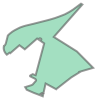

In [60]:
parks_shapes[0]

### Turning Distance Calcuation into Miles
This distance is in degrees. 1 degree latitude ~= to 69 miles. 1 degree longitude ~= 40 miles at NYC's latitude.

I'm going to treat a degree as equal to 54.5 miles, the average of the lengths of the two different kinds of degrees, for the purpose of these distance calculations. This means that my calculations of distance could be off by as much as 36.25%, if the change in position is actually only a change in longitude, latitude staying the same (in other words, 1 degree change actually equaling 40 miles). For a change only in latitude (longitude staying the same), the error rate is 21%.

Unfortunately, given the time line I'm on, I'm going to accept this level of imprecision. 

I tested the code on the following two entries from parks and from permits. My calculation of 14.13 miles is reasonably accurate.

I used [this website](https://www.mapdevelopers.com/distance_from_to.php) to the straight line distance between the two _addresses_ and got 16.67 miles, which is close. It's also important to note that the closest edge of the park is actually nearer to the site in permits than the location of the street address of the park. So it appears that this code is working in the right direction.

In [63]:
t0 = time.time()

for i in permits.index:
    t1 = time.time()
    print(f'Permit {i} started.')
    #point = shapely.wkt.loads(permits['point'][i])
    point = permits['point'][i]
    close_park = 99999
    name_close_park = ''
    for n in range(0, len(parks_shapes)):
        distance = point.distance(parks_shapes[n])*54.5
        if distance < close_park:
            close_park = distance
            name_close_park = parks.loc[n, 'name311']
    permits.loc[i, 'closest_park'] = close_park
    permits.loc[i, 'name_closest_park'] = name_close_park
    print(f"Permit {i} finished at {time.time()}, after {time.time()-t1}, {time.time()-t0} since the start of the permit {i} code.")
print(f'Time to complete code: {time.time()-t0}') 

Permit 2794 started.
Permit 2794 finished at 1660300950.229833, after 0.023794174194335938, 0.02475285530090332 since the start of the permit 2794 code.
Permit 2798 started.
Permit 2798 finished at 1660300950.242919, after 0.012944936752319336, 0.03783822059631348 since the start of the permit 2798 code.
Permit 3067 started.
Permit 3067 finished at 1660300950.2553, after 0.012291193008422852, 0.050222158432006836 since the start of the permit 3067 code.
Permit 5388 started.
Permit 5388 finished at 1660300950.266659, after 0.011266708374023438, 0.06157803535461426 since the start of the permit 5388 code.
Permit 6667 started.
Permit 6667 finished at 1660300950.277709, after 0.010977029800415039, 0.07262587547302246 since the start of the permit 6667 code.
Permit 6835 started.
Permit 6835 finished at 1660300950.287328, after 0.009559154510498047, 0.0822441577911377 since the start of the permit 6835 code.
Permit 0 started.
Permit 0 finished at 1660300950.291751, after 0.004386186599731445

Looking at some of these to make sure they make sense... They line up. Interestingly, the Malls on Broadway are considered a park. So an address on Broadway is considered to be at a park.

In [64]:
permits.head()

,borough,bin_no,house_no,street_name,job_no,zip_code,job_start_date,owners_business_type,non-profit,latitude,...,bct2020,total_complaints,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,hist_dist_name,in_hist_dist,closest_park,name_closest_park
2794,BROOKLYN,3426514.0,221,MIDDLETON ST,321112862.0,11206.0,2017-10-23,INDIVIDUAL,N,40.704171,...,3050900.0,1281.0,4.0,16.0,47.0,224.0,none,0.0,0.046382,Lindsay Triangle
2798,STATEN ISLAND,5165138.0,398,PAGE AVENUE,520287010.0,10307.0,2017-10-23,PARTNERSHIP,N,40.514573,...,5024401.0,15.0,0.0,6.0,8.0,15.0,none,0.0,0.010345,Long Pond Park
3067,BROOKLYN,3425205.0,436,FLUSHING AVENUE,321547215.0,11205.0,2017-12-19,PARTNERSHIP,N,40.698902,...,3123700.0,596.0,0.0,2.0,43.0,250.0,none,0.0,0.123985,Sarah J.S. Tompkins Garnet Playground
5388,BRONX,2816717.0,1167,VYSE AVENUE,220635212.0,10459.0,2020-08-12,CORPORATION,N,40.827879,...,2012101.0,1671.0,0.0,11.0,35.0,158.0,none,0.0,0.083294,Synergi Urban Garden UCFP
6667,QUEENS,4163388.0,64-62,230 STREET,440664504.0,11364.0,2022-01-28,INDIVIDUAL,N,40.749181,...,4137700.0,211.0,0.0,0.0,0.0,0.0,none,0.0,0.135075,Alley Park


## Parks within a given radius

In [66]:
# note: the lati../backup_data/and longitude I'm using are in decimals NOT minutes, so I do the same here
# these are set at a tenth of a mile to start, with 1 degree lat = 69 miles and 1 degree longitude = 40 miles
max_delt_lat = 1/690 #CHANGE HERE
max_delt_long = 1/400 #CHANGE HERE

t0 = time.time()
print("Tenth mile started ", t0)
for i in permits.index:
    count = 0
    #point = shapely.wkt.loads(permits.loc[i, 'point'])
    point = permits.loc[i, 'point']
    for n in range(0, len(parks_shapes)):
        distance = point.distance(parks_shapes[n])*54.5
        if distance < .1: # CHANGE HERE
            count += 1
    permits.loc[i, 'park_count_tenth_mi'] = count #CHANGE HERE

print("Time to run tenth mile:", time.time()-t0) #CHANGE HERE
print('')


max_delt_lat = 5/690 #CHANGE HERE
max_delt_long = 5/400 #CHANGE HERE

t0 = time.time()
print("Half mile started ", t0)
for i in permits.index:
    count = 0
    #point = shapely.wkt.loads(permits.loc[i, 'point'])
    point = permits.loc[i, 'point']
    for n in range(0, len(parks_shapes)):
        distance = point.distance(parks_shapes[n])*54.5
        if distance < .5: # CHANGE HERE
            count += 1
    permits.loc[i, 'park_count_half_mi'] = count #CHANGE HERE

print("Time to run half mile:", time.time()-t0) #CHANGE HERE
print('')


max_delt_lat = 10/690 #CHANGE HERE
max_delt_long = 10/400 #CHANGE HERE

t0 = time.time()
print("Mile started ", t0)
for i in permits.index:
    count = 0
    #point = shapely.wkt.loads(permits.loc[i, 'point'])
    point = permits.loc[i, 'point']
    for n in range(0, len(parks_shapes)):
        distance = point.distance(parks_shapes[n])*54.5
        if distance < 1: # CHANGE HERE
            count += 1
    permits.loc[i, 'park_count_one_mi'] = count #CHANGE HERE

print("Time to run one mile:", time.time()-t0) #CHANGE HERE
print('')

max_delt_lat = 25/690 #CHANGE HERE
max_delt_long = 25/400 #CHANGE HERE

t0 = time.time()
print("2.5 mile started ", t0)
for i in permits.index:
    count = 0
    #point = shapely.wkt.loads(permits.loc[i, 'point'])
    point = permits.loc[i, 'point']
    for n in range(0, len(parks_shapes)):
        distance = point.distance(parks_shapes[n])*54.5
        if distance < 2.5: # CHANGE HERE
            count += 1
    permits.loc[i, 'park_count_two_five_mi'] = count #CHANGE HERE

print("Time to run 2.5 mile:", time.time()-t0) #CHANGE HERE
print('')

Tenth mile started  1660301065.6275258
Time to run tenth mile: 0.07146620750427246

Half mile started  1660301065.69917
Time to run half mile: 0.05182003974914551

Mile started  1660301065.7511349
Time to run one mile: 0.05129599571228027

2.5 mile started  1660301065.8025541
Time to run 2.5 mile: 0.053021907806396484



In [67]:
permits.head()

,borough,bin_no,house_no,street_name,job_no,zip_code,job_start_date,owners_business_type,non-profit,latitude,...,subway_count_one_mi,subway_count_two_five_mi,hist_dist_name,in_hist_dist,closest_park,name_closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi
2794,BROOKLYN,3426514.0,221,MIDDLETON ST,321112862.0,11206.0,2017-10-23,INDIVIDUAL,N,40.704171,...,47.0,224.0,none,0.0,0.046382,Lindsay Triangle,4.0,28.0,103.0,368.0
2798,STATEN ISLAND,5165138.0,398,PAGE AVENUE,520287010.0,10307.0,2017-10-23,PARTNERSHIP,N,40.514573,...,8.0,15.0,none,0.0,0.010345,Long Pond Park,1.0,5.0,8.0,19.0
3067,BROOKLYN,3425205.0,436,FLUSHING AVENUE,321547215.0,11205.0,2017-12-19,PARTNERSHIP,N,40.698902,...,43.0,250.0,none,0.0,0.123985,Sarah J.S. Tompkins Garnet Playground,0.0,19.0,99.0,380.0
5388,BRONX,2816717.0,1167,VYSE AVENUE,220635212.0,10459.0,2020-08-12,CORPORATION,N,40.827879,...,35.0,158.0,none,0.0,0.083294,Synergi Urban Garden UCFP,2.0,27.0,84.0,318.0
6667,QUEENS,4163388.0,64-62,230 STREET,440664504.0,11364.0,2022-01-28,INDIVIDUAL,N,40.749181,...,0.0,0.0,none,0.0,0.135075,Alley Park,0.0,3.0,20.0,66.0


In [78]:
permits

,borough,bin_no,house_no,street_name,job_no,zip_code,job_start_date,owners_business_type,non-profit,latitude,longitude,point,in_nyc,in_borough,bct2020,total_complaints,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,hist_dist_name,in_hist_dist,closest_park,name_closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi
2794,BROOKLYN,3426514.0,221,MIDDLETON ST,321112862.0,11206.0,2017-10-23,INDIVIDUAL,N,40.704171,-73.949290,POINT (-73.94929 40.704171),1.0,BROOKLYN,3050900.0,1281.0,4.0,16.0,47.0,224.0,none,0.0,0.046382,Lindsay Triangle,4.0,28.0,103.0,368.0
2798,STATEN ISLAND,5165138.0,398,PAGE AVENUE,520287010.0,10307.0,2017-10-23,PARTNERSHIP,N,40.514573,-74.232284,POINT (-74.232284 40.514573),1.0,STATEN ISLAND,5024401.0,15.0,0.0,6.0,8.0,15.0,none,0.0,0.010345,Long Pond Park,1.0,5.0,8.0,19.0
3067,BROOKLYN,3425205.0,436,FLUSHING AVENUE,321547215.0,11205.0,2017-12-19,PARTNERSHIP,N,40.698902,-73.957409,POINT (-73.957409 40.698902),1.0,BROOKLYN,3123700.0,596.0,0.0,2.0,43.0,250.0,none,0.0,0.123985,Sarah J.S. Tompkins Garnet Playground,0.0,19.0,99.0,380.0
5388,BRONX,2816717.0,1167,VYSE AVENUE,220635212.0,10459.0,2020-08-12,CORPORATION,N,40.827879,-73.889965,POINT (-73.889965 40.827879),1.0,BRONX,2012101.0,1671.0,0.0,11.0,35.0,158.0,none,0.0,0.083294,Synergi Urban Garden UCFP,2.0,27.0,84.0,318.0
6667,QUEENS,4163388.0,64-62,230 STREET,440664504.0,11364.0,2022-01-28,INDIVIDUAL,N,40.749181,-73.747600,POINT (-73.7476 40.749181),1.0,QUEENS,4137700.0,211.0,0.0,0.0,0.0,0.0,none,0.0,0.135075,Alley Park,0.0,3.0,20.0,66.0
6835,STATEN ISLAND,5171643.0,265,YORK AVENUE,520228584.0,10301.0,2019-01-17,INDIVIDUAL,N,40.639924,-74.088026,POINT (-74.088026 40.639924),1.0,STATEN ISLAND,5007700.0,1455.0,0.0,0.0,3.0,6.0,none,0.0,0.039747,Skyline Playground,2.0,10.0,23.0,62.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,0.0,0.000000,High Rock Park,2030.0,2030.0,2030.0,2030.0


In [77]:
permits.to_csv('data/added_permits.csv', index = False)